<a href="https://colab.research.google.com/github/zhany9974-sys/readme.md./blob/main/programing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1:Data Cleaning Process

In [21]:
# read the dataset from the dataset_student_raw.csv file
df_1=pd.read_excel("/content/dataset_student_raw.csv.xlsx")

# Check for missing values
num_miss_val=df_1.isnull().sum().to_string()
# Shows how many missing value there is in the dataset
print (f"the number of missing value is in the following:\n{num_miss_val}\n")

# -- Handling Missing Values --
# Handle missing values for Consumption_kWh by interpolation
df_1['Consumption_kWh'] = df_1['Consumption_kWh'].interpolate()
# Handle misisng values for Cost_RM
df_1['Cost_RM']=df_1['Consumption_kWh']*0.57
# Handle missing values for Occupants by using median
df_1['Occupants'] = df_1['Occupants'].fillna(df_1['Occupants'].median())

# ---- detecting outliers ----
# --- Consumption_KWh ---
# Detect outliers using IQR for each region respectively
for region in df_1['Region'].unique():
    region_mask = df_1['Region'] == region
    Q1 = df_1.loc[region_mask, 'Consumption_kWh'].quantile(0.25)
    Q3 = df_1.loc[region_mask, 'Consumption_kWh'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    print (upper, region)

    outliers = (df_1.loc[region_mask, 'Consumption_kWh'] < lower) | \
               (df_1.loc[region_mask, 'Consumption_kWh'] > upper)

# Replaces consumption outliers with median for each region respectively
    df_1.loc[region_mask & outliers, 'Consumption_kWh'] = \
        df_1.loc[region_mask, 'Consumption_kWh'].median()

# --- Cost_RM --
# detect outliers using IQR for each region respectively
for region in df_1['Region'].unique():
    region_mask = df_1['Region'] == region
    Q1 = df_1.loc[region_mask, 'Cost_RM'].quantile(0.25)
    Q3 = df_1.loc[region_mask, 'Cost_RM'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = (df_1.loc[region_mask, 'Cost_RM'] < lower) | \
               (df_1.loc[region_mask, 'Cost_RM'] > upper)

# Recalculating Cost_RM
df_1['Cost_RM']= df_1['Consumption_kWh'] * 0.57

# save the modified dataset in a new csv file
df_1.to_csv("dataset_student_cleaned.csv", index=False)


the number of missing value is in the following:
Year               0
Month              0
Region             0
Consumption_kWh    5
Cost_RM            5
Occupants          5

633.2912500000001 Urban
566.5624999999999 Suburban
457.7025 Rural


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

Inspect Missing Values and Outliers

In [23]:
# read the dataset from the dataset_student_raw.csv file
df_1=pd.read_excel("/content/dataset_student_raw.csv.xlsx")

# Check for missing values
num_miss_val=df_1.isnull().sum().to_string()
# Shows how many missing value there is in the dataset
print (f"the number of missing value is in the following:\n{num_miss_val}\n")

# -- Handling Missing Values --
# Handle missing values for Consumption_kWh by interpolation
df_1['Consumption_kWh'] = df_1['Consumption_kWh'].interpolate()
# Handle misisng values for Cost_RM
df_1['Cost_RM']=df_1['Consumption_kWh']*0.57
# Handle missing values for Occupants by using median
df_1['Occupants'] = df_1['Occupants'].fillna(df_1['Occupants'].median())

# ---- detecting outliers ----
# --- Consumption_KWh ---
# Detect outliers using IQR for each region respectively
for region in df_1['Region'].unique():
    region_mask = df_1['Region'] == region
    Q1 = df_1.loc[region_mask, 'Consumption_kWh'].quantile(0.25)
    Q3 = df_1.loc[region_mask, 'Consumption_kWh'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    print (upper, region)

    outliers = (df_1.loc[region_mask, 'Consumption_kWh'] < lower) | \
               (df_1.loc[region_mask, 'Consumption_kWh'] > upper)

# Replaces consumption outliers with median for each region respectively
    df_1.loc[region_mask & outliers, 'Consumption_kWh'] = \
        df_1.loc[region_mask, 'Consumption_kWh'].median()

# --- Cost_RM --
# detect outliers using IQR for each region respectively
for region in df_1['Region'].unique():
    region_mask = df_1['Region'] == region
    Q1 = df_1.loc[region_mask, 'Cost_RM'].quantile(0.25)
    Q3 = df_1.loc[region_mask, 'Cost_RM'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = (df_1.loc[region_mask, 'Cost_RM'] < lower) | \
               (df_1.loc[region_mask, 'Cost_RM'] > upper)

# Recalculating Cost_RM
df_1['Cost_RM']= df_1['Consumption_kWh'] * 0.57

# save the modified dataset in a new csv file
df_1.to_csv("dataset_student_cleaned.csv", index=False)

the number of missing value is in the following:
Year               0
Month              0
Region             0
Consumption_kWh    5
Cost_RM            5
Occupants          5

633.2912500000001 Urban
566.5624999999999 Suburban
457.7025 Rural


### 1. Monthly consumption trends for each region

### 2. Multi-line plot comparing all regions (average consumption)

### 3. Scatter plot: Occupants vs Consumption

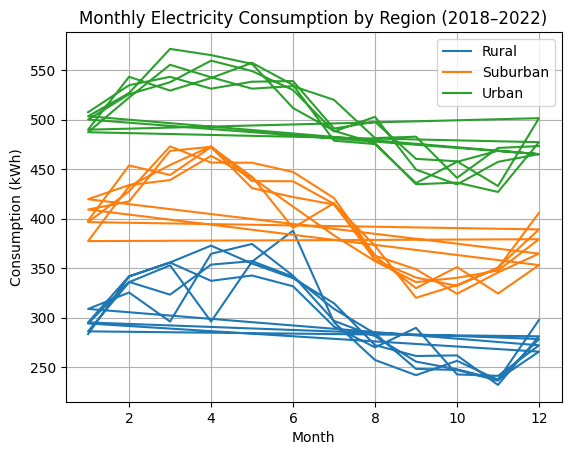

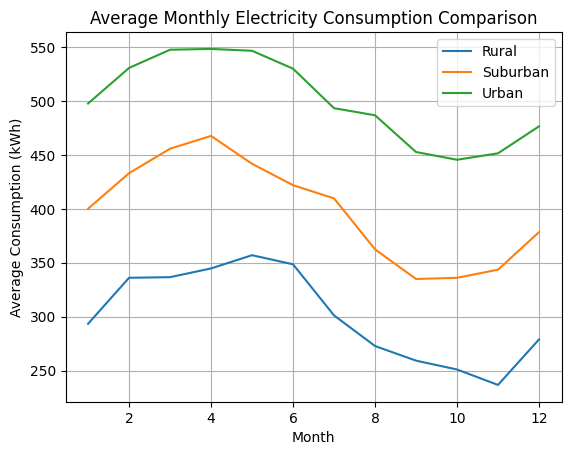

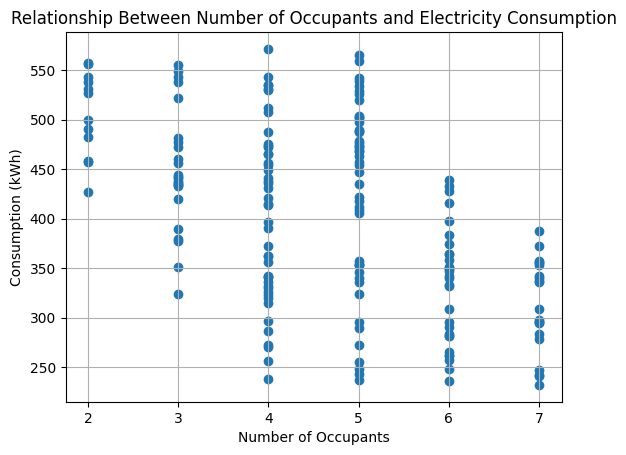

In [24]:
plt.figure()
for region in df_2['Region'].unique():
    region_data = df_2[df_2['Region'] == region]
    plt.plot(region_data['Month'], region_data['Consumption_kWh'], label=region)

plt.title("Monthly Electricity Consumption by Region (2018–2022)")
plt.xlabel("Month")
plt.ylabel("Consumption (kWh)")
plt.legend()
plt.grid(True)
plt.show()

avg_consumption = df_2.groupby(['Month', 'Region'])['Consumption_kWh'].mean().reset_index()

plt.figure()
for region in avg_consumption['Region'].unique():
    data = avg_consumption[avg_consumption['Region'] == region]
    plt.plot(data['Month'], data['Consumption_kWh'], label=region)

plt.title("Average Monthly Electricity Consumption Comparison")
plt.xlabel("Month")
plt.ylabel("Average Consumption (kWh)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.scatter(df_2['Occupants'], df_2['Consumption_kWh'])
plt.title("Relationship Between Number of Occupants and Electricity Consumption")
plt.xlabel("Number of Occupants")
plt.ylabel("Consumption (kWh)")
plt.grid(True)
plt.show()

Task 2:Descriptive Data Analysis

In [25]:
# Load the original dataset (adjust file path as needed)
df_2= pd.read_csv('dataset_student_cleaned.csv')

#Summary Statistics by Region
# Computing mean, median, std for Consumption_kWh and Cost_RM grouped by Region
summary_stats = df_2.groupby('Region')[['Consumption_kWh', 'Cost_RM']].agg([
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Standard Deviation', 'std')]).round(2)
# Print the summary statistics with clear formatting
print("=" * 60)
print("Summary Statistics of Electricity Consumption and Cost by Region")
print("=" * 60)
print(summary_stats)
print("\n")

#----Relationship between consump and occupants----
#calculate correlation coefficient
correlation = (df_2['Consumption_kWh']).corr(df_2['Occupants'])
# Print correlation result
print("=" * 60)
print("Correlation Analysis: Occupants vs Electricity Consumption")
print("=" * 60)
print(f"Pearson Correlation Coefficient: {correlation:.4f}")
print("\n")


#----Relationship Pattern Comments----
print("=" * 60)
print("Relationship Pattern Comment")
print("=" * 60)

#---Regional Consumption/Cost Patterns---
# Read summary stats from each region
urban_consumption = summary_stats.loc['Urban', ('Consumption_kWh', 'Mean')]
suburban_consumption = summary_stats.loc['Suburban', ('Consumption_kWh', 'Mean')]
rural_consumption = summary_stats.loc['Rural', ('Consumption_kWh', 'Mean')]
# display observation
print(f"1. Regional Consumption: Urban households have the highest average consumption ({urban_consumption} kWh), "
      f"followed by Suburban ({suburban_consumption} kWh) and Rural ({rural_consumption} kWh) regions.")
print("This aligns with higher electricity demand from urban amenities and larger household appliances.\n")

#---Cost Pattern (derived from consumption, as Cost_RM = Consumption_kWh * 0.57)---
# gather cost_RM stats
urban_cost = summary_stats.loc['Urban', ('Cost_RM', 'Mean')]
rural_cost = summary_stats.loc['Rural', ('Cost_RM', 'Mean')]
# display observation
print(f"2. Regional Cost: Urban households have the highest average cost ({urban_cost} RM), "
      f"which is {urban_cost - rural_cost:.2f} RM higher than Rural households on average.\n")

#---Correlation Pattern---
# determine the correlation strength type
if correlation > 0.3:
    corr_strength = "moderate positive"
elif 0 < correlation <= 0.3:
    corr_strength = "weak positive"
elif correlation == 0:
    corr_strength = "no"
elif -0.3 <= correlation < 0:
    corr_strength = "weak negative"
else:
    corr_strength = "moderate negative"
# display observation
print(f"3. Occupancy-Consumption Relationship: There is a {corr_strength} correlation ({correlation:.4f}) "
      f"between the number of occupants and electricity consumption.")
print("This suggests that as household size increases, electricity usage tends to increase slightly.\n")

#---Variability Observation---
# gather standard deviation
urban_std = summary_stats.loc['Urban', ('Consumption_kWh', 'Standard Deviation')]
rural_std = summary_stats.loc['Rural', ('Consumption_kWh', 'Standard Deviation')]
# display observation
print(f"4. Variability: Urban households show higher consumption variability ({urban_std} kWh) compared to Rural "
      f"households ({rural_std} kWh), indicating more diverse usage patterns in urban areas.")
print("=" * 60)
print("\n\n\n")


Summary Statistics of Electricity Consumption and Cost by Region
         Consumption_kWh                            Cost_RM          \
                    Mean  Median Standard Deviation    Mean  Median   
Region                                                                
Rural             301.40  295.63              43.21   171.8  168.51   
Suburban          398.77  407.51              47.19   227.3  232.28   
Urban             500.52  500.78              39.98   285.3  285.44   

                             
         Standard Deviation  
Region                       
Rural                 24.63  
Suburban              26.90  
Urban                 22.79  


Correlation Analysis: Occupants vs Electricity Consumption
Pearson Correlation Coefficient: -0.5287


Relationship Pattern Comment
1. Regional Consumption: Urban households have the highest average consumption (500.52 kWh), followed by Suburban (398.77 kWh) and Rural (301.4 kWh) regions.
This aligns with higher electricity d

Task 3: Data Visualisation

<Figure size 640x480 with 0 Axes>

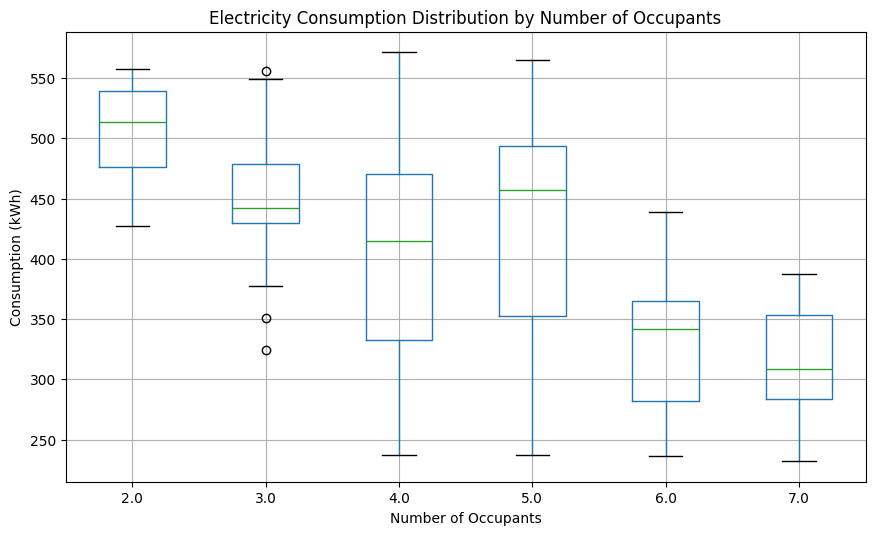

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the cleaned dataset
df_2 = pd.read_csv('dataset_student_cleaned.csv')

# ================================
# 3. Box plot: Occupants vs Consumption
# ================================
plt.figure()
df_2.boxplot(column='Consumption_kWh', by='Occupants', figsize=(10, 6))
plt.title("Electricity Consumption Distribution by Number of Occupants")
plt.xlabel("Number of Occupants")
plt.ylabel("Consumption (kWh)")
plt.suptitle('') # Suppress the default title generated by boxplot
plt.grid(True)
plt.show()


Task 4: Predictive Analysis

Linear Regression Model Performance Evaluation
R-squared (R²): 1.00
Mean Absolute Error (MAE): 0.00 RM




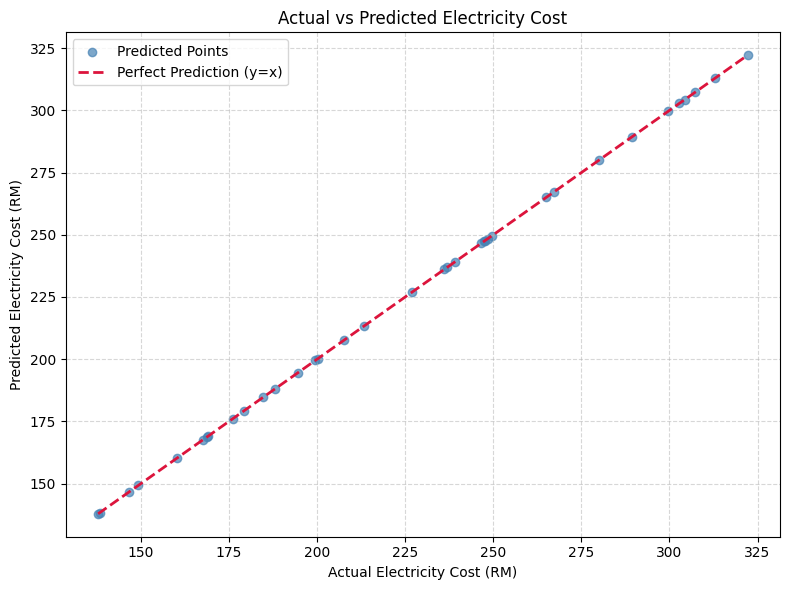

Prediction Result Interpretation
1. Model Fit: R² value (1.00) shows excellent fit to the data.
2. Prediction Error: On average, predictions are 0.00 RM off from actual cost.
3. Prediction Bias: 2.8% of predictions are higher than actual cost, 80.6% are lower.


In [27]:
# Select feature columns (input variables) - electricity consumption and number of occupants
features = df_2[['Consumption_kWh', 'Occupants']]

# Select target column (output variable) - electricity cost
target = df_2['Cost_RM']

# Split the dataset into training and testing sets
# Test size is 20% and random_state=42 ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize a Linear Regression model
lr_model = LinearRegression()

# Fit the model using the training data
lr_model.fit(X_train, y_train)

# Predict target values for the test set
y_predicted = lr_model.predict(X_test)

# Calculate R-squared (R²) score to measure model's goodness-of-fit (closer to 1 is better)
r2_score_value = r2_score(y_test, y_predicted)

# Calculate Mean Absolute Error (MAE) to measure average prediction error
mae_value = mean_absolute_error(y_test, y_predicted)

# Print a separator and title for model evaluation
print("=" * 60)
print("Linear Regression Model Performance Evaluation")
print("=" * 60)

# Print R² score with 2 decimal places
print(f"R-squared (R²): {r2_score_value:.2f}")

# Print Mean Absolute Error with 2 decimal places
print(f"Mean Absolute Error (MAE): {mae_value:.2f} RM")
print("=" * 60)
print("\n")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))

# Scatter plot of predicted vs actual points, semi-transparent blue
plt.scatter(y_test, y_predicted, color='steelblue', label='Predicted Points', alpha=0.7)

# Plot the perfect prediction line (y=x) as a red dashed line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='crimson', linestyle='--', linewidth=2, label='Perfect Prediction (y=x)')

# Set x-axis label
plt.xlabel('Actual Electricity Cost (RM)')

# Set y-axis label
plt.ylabel('Predicted Electricity Cost (RM)')

# Set plot title
plt.title('Actual vs Predicted Electricity Cost')

# Add legend at upper left corner
plt.legend(loc='upper left')

# Add grid with dashed lines and semi-transparency
plt.grid(True, linestyle='--', alpha=0.5)

# Automatically adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

# Print separator and title for prediction interpretation
print("=" * 60)
print("Prediction Result Interpretation")
print("=" * 60)

# Determine the quality of model fit based on R² value
if r2_score_value >= 0.8:
    fit_quality = "excellent"  # very good fit
elif r2_score_value >= 0.6:
    fit_quality = "good"       # good fit
elif r2_score_value >= 0.4:
    fit_quality = "moderate"   # moderate fit
else:
    fit_quality = "poor"       # poor fit

# Print model fit evaluation
print(f"1. Model Fit: R² value ({r2_score_value:.2f}) shows {fit_quality} fit to the data.")

# Print average prediction error
print(f"2. Prediction Error: On average, predictions are {mae_value:.2f} RM off from actual cost.")

# Calculate percentage of predictions that overestimate the actual cost
over_pred_percent = (sum(y_predicted > y_test) / len(y_predicted)) * 100

# Calculate percentage of predictions that underestimate the actual cost
under_pred_percent = (sum(y_predicted < y_test) / len(y_predicted)) * 100

# Print prediction bias information
print(f"3. Prediction Bias: {over_pred_percent:.1f}% of predictions are higher than actual cost, "
      f"{under_pred_percent:.1f}% are lower.")
print("=" * 60)
